In [1]:
!pip install g4f

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 637.0/637.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer

from g4f.client import Client

In [3]:
df = pd.read_csv('comments.csv', on_bad_lines='skip')

In [4]:
df.authorDisplayName.count()

106216

In [13]:
df.tail()

,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelIdValue,textDisplay,textOriginal,parentId,canRate,viewerRating,likeCount,publishedAt,updatedAt,video_id,comment_length
116322,@JohnWeek1337,https://yt3.ggpht.com/dT3fb0JNMoUbOaHio-4H2pAf...,http://www.youtube.com/@JohnWeek1337,UCcGo7IdL62r4UYLkpSWAx3w,8:51 я все слышу :),8:51 я все слышу :),NaN,True,none,0,2023-09-01T05:38:37Z,2023-09-01T05:38:37Z,22xItAfpCC8,19
116323,@elizavetasevr13,https://yt3.ggpht.com/ytc/AIdro_limlL_q9eLGh8b...,http://www.youtube.com/@elizavetasevr13,UCQy1MV-dstrtsuKe6gAiESQ,"Детишки катаются все в крови, радостные😅😂","Детишки катаются все в крови, радостные😅😂",NaN,True,none,0,2023-09-01T05:37:34Z,2023-09-01T05:37:34Z,22xItAfpCC8,41
116324,@sims2476,https://yt3.ggpht.com/ytc/AIdro_n7a1Sm8fDqZCY_...,http://www.youtube.com/@sims2476,UCBaX_YLuv9-F4nl-4e-3Krw,Просто супер. Обожаю ваши 😮выпуски,Просто супер. Обожаю ваши 😮выпуски,NaN,True,none,0,2023-09-01T05:36:02Z,2023-09-01T05:36:01Z,22xItAfpCC8,34
116325,@intravert1983,https://yt3.ggpht.com/AFvAeccwXwqh7QwykC1DdbUb...,http://www.youtube.com/@intravert1983,UCme0lE8lvtV7i1SDeS5HBTA,Как всегда много интересной информации и монта...,Как всегда много интересной информации и монта...,NaN,True,none,3,2023-09-01T05:35:50Z,2023-09-01T05:35:50Z,22xItAfpCC8,69
116326,@JohnWeek1337,https://yt3.ggpht.com/dT3fb0JNMoUbOaHio-4H2pAf...,http://www.youtube.com/@JohnWeek1337,UCcGo7IdL62r4UYLkpSWAx3w,Кто-то вдохновился вступительным роликом секре...,Кто-то вдохновился вступительным роликом секре...,NaN,True,none,0,2023-09-01T05:35:47Z,2023-09-01T05:35:46Z,22xItAfpCC8,112


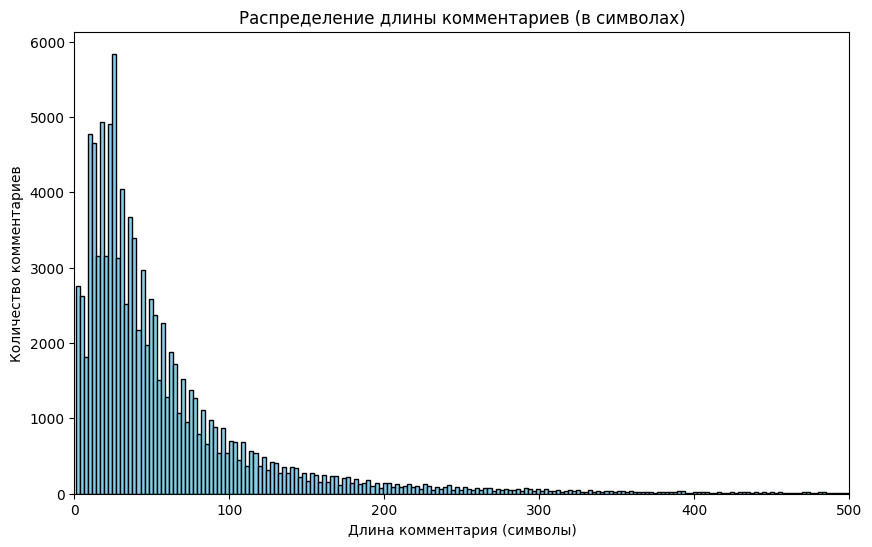

In [5]:
df['comment_length'] = df['textDisplay'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['comment_length'], bins=3000, color='skyblue', edgecolor='black')
plt.title('Распределение длины комментариев (в символах)')
plt.xlabel('Длина комментария (символы)')
plt.ylabel('Количество комментариев')
plt.xlim(0, 500)
plt.show()

In [ ]:
df.sort_values(by='likeCount', ascending=False).head()

,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelIdValue,textDisplay,textOriginal,parentId,canRate,viewerRating,likeCount,publishedAt,updatedAt,video_id,comment_length
67362,@amazingearth9691,https://yt3.ggpht.com/E6fEFQW8oA4Nna7la5a37vUC...,http://www.youtube.com/@amazingearth9691,UCktcYMsewBsAirIaoTeKUzg,Снимите выпуск про канализацию. Систему утилиз...,Снимите выпуск про канализацию. Систему утилиз...,NaN,True,none,26213,2024-04-04T14:09:11Z,2024-04-07T23:17:41Z,1A_9slmQx8M,259
67592,@bestia_show,https://yt3.ggpht.com/SovHKlhbiISNtCTOw_DHOCwX...,http://www.youtube.com/@bestia_show,UCE8mV-lKMFlV6ksKneq_WZQ,"Надеюсь, что его найдут...\nP. S. Я знаю, что ...","Надеюсь, что его найдут...\nP. S. Я знаю, что ...",NaN,True,none,23430,2024-04-04T13:58:54Z,2024-04-19T21:32:42Z,1A_9slmQx8M,66
98121,@pz4mku1fnr8,https://yt3.ggpht.com/4sAn9UNOJnLaf3IZgfb7RKxe...,http://www.youtube.com/@pz4mku1fnr8,UC-vfngaAIrhREhDYZ2jUTAQ,"Ян сделай выпуск про политические идеологии, ф...","Ян сделай выпуск про политические идеологии, ф...",NaN,True,none,21905,2023-12-09T08:58:06Z,2023-12-09T08:58:06Z,r_WuDtcXbOg,309
54027,@Наумчиквлад-б9щ,https://yt3.ggpht.com/ytc/AIdro_nNAUOorrpW7ncB...,http://www.youtube.com/@%D0%9D%D0%B0%D1%83%D0%...,UC3aRlclVb9PTkUl1wcuYSIQ,"Ян , найми переводчиков на английский язык, чт...","Ян , найми переводчиков на английский язык, чт...",NaN,True,none,15702,2024-05-07T18:45:05Z,2024-05-07T18:45:05Z,dHSVsmyv-74,243
7313,@alexseyashin,https://yt3.ggpht.com/ytc/AIdro_l5cqXRy3hzpr1K...,http://www.youtube.com/@alexseyashin,UCWGhv2f_3eNjkikkPpPWUsw,давай большой выпуск про беременность и рожден...,давай большой выпуск про беременность и рожден...,NaN,True,none,14525,2024-10-03T17:56:16Z,2024-10-04T06:27:39Z,u8tDyq9olxs,198


In [ ]:
df.loc[67362].textDisplay

'Снимите выпуск про канализацию. Систему утилизации отходов оттуда ; как очищают воду чтоб в ней не было заразы. Ведь мы пьем по сути одну  и туже воду уже тысячи лет. Что происходит когда в воду попадает кровь больных и тд. Тема очень интересная , жду выпуск!'

In [15]:
df.likeCount.fillna(0)
df.comment_length = df.comment_length.astype('int')

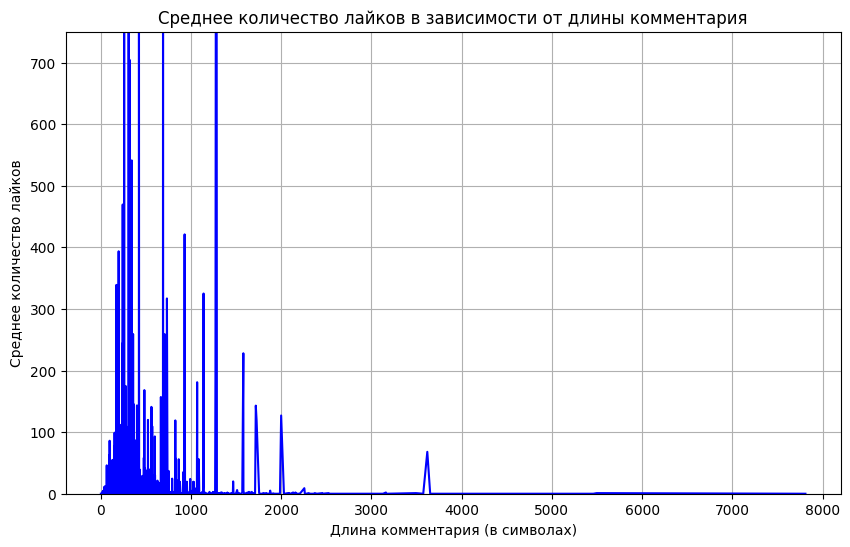

In [14]:
like_by_length = df.groupby('comment_length')['likeCount'].mean()

plt.figure(figsize=(10, 6))
like_by_length.plot(kind='line', color='blue')
plt.title('Среднее количество лайков в зависимости от длины комментария')
plt.xlabel('Длина комментария (в символах)')
plt.ylabel('Среднее количество лайков')
plt.grid(True)
plt.ylim(0, 750)
plt.show()

In [12]:
like_by_length.head(20)

,likeCount
comment_length,
1,0.060976
2,0.083451
3,0.079646
4,0.142857
5,0.082673
6,0.123357
7,0.082177
8,0.089143
9,0.084906


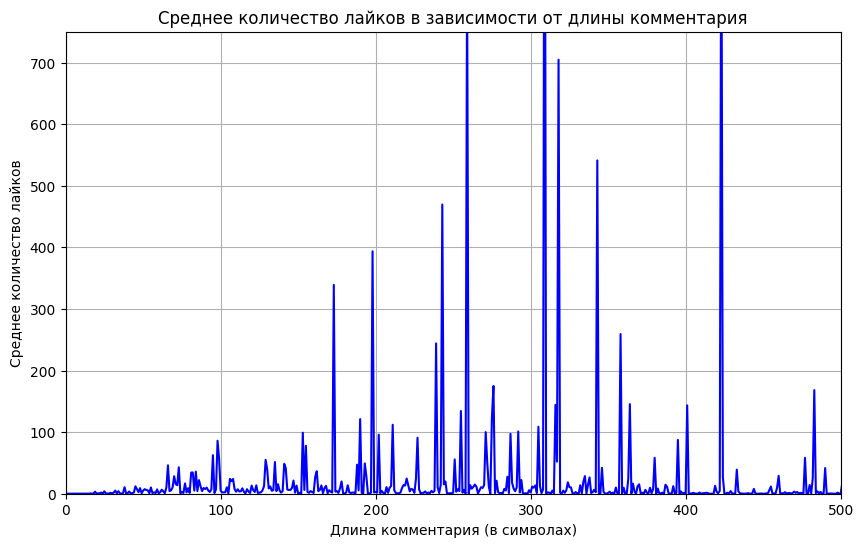

In [ ]:
plt.figure(figsize=(10, 6))
like_by_length.plot(kind='line', color='blue')
plt.title('Среднее количество лайков в зависимости от длины комментария')
plt.xlabel('Длина комментария (в символах)')
plt.ylabel('Среднее количество лайков')
plt.grid(True)
plt.ylim(0, 750)
plt.xlim(0, 500)
plt.show()

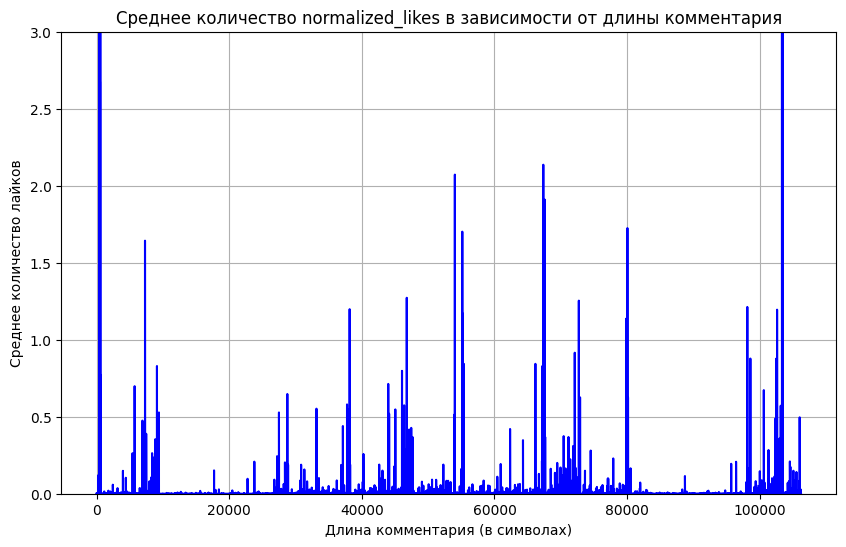

In [ ]:
comment_counts = df['video_id'].value_counts()
df['total_comments_for_video'] = df['video_id'].map(comment_counts)
df['normalized_likes'] = df['likeCount'] / df['total_comments_for_video']

df[['video_id', 'textDisplay', 'likeCount', 'total_comments_for_video', 'normalized_likes']]

plt.figure(figsize=(10, 6))
df['normalized_likes'].plot(kind='line', color='blue')
plt.title('Среднее количество normalized_likes в зависимости от длины комментария')
plt.xlabel('Длина комментария (в символах)')
plt.ylabel('Среднее количество лайков')
plt.ylim(0, 3)
plt.grid(True)
plt.show()

# Кодировка комментариев с помощью Word2Vec

In [ ]:
def comment_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)  # Возвращаем нулевой вектор, если слов нет в словаре модели
    else:
        return np.mean(vectors, axis=0)

In [ ]:
nltk.download('punkt')
df['tokens'] = df['textDisplay'].astype(str).apply(word_tokenize)

w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, sg=1)

df['comment_vector'] = df['tokens'].apply(comment_vector)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## DBSCAN

In [ ]:
comment_vectors = np.vstack(df['comment_vector'].values)

scaler = StandardScaler()
comment_vectors_scaled = scaler.fit_transform(comment_vectors)

dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(comment_vectors_scaled)

df['cluster'] = clusters

In [ ]:
# метод сработал не очень хорошо. Много объектов попали в выбросы, и при настройке гиперпараметров ситуация не меняется
# метод очень чувствительный.
df['cluster'].value_counts()

,count
cluster,
-1,92693
2,2206
502,362
18,271
490,256
...,...
149,5
460,5
461,5


## Agglomerative

In [ ]:
df_sampled = df.sample(frac=0.3, random_state=42)
comment_vectors = np.vstack(df_sampled['comment_vector'].values)

scaler = StandardScaler()
comment_vectors_scaled = scaler.fit_transform(comment_vectors)

# pca = PCA(n_components=5)
# comment_vectors_scaled = pca.fit_transform(comment_vectors_scaled)

# Применяем иерархическую кластеризацию с 10 кластерами
hierarchical_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
clusters = hierarchical_clustering.fit_predict(comment_vectors_scaled)

df_sampled['cluster'] = clusters
df_sampled['cluster'].value_counts()

,count
cluster,
2,15918
9,4089
0,3681
4,1978
5,1579
1,1550
8,1276
3,1025
6,539


In [ ]:
for cluster_id in df_sampled['cluster'].unique():
    print(f"\nCluster {cluster_id}:")
    print(df_sampled[df_sampled['cluster'] == cluster_id]['textDisplay'].head(5))



Cluster 3:
17892    меня одного смущает кепка в виде украинского т...
70696    Планы на 2024 год: испортить обмен веществ, не...
87742    Это первое видео которое посмотрел от данного ...
49041    Не могу понять частое употребление слова на@ба...
34548    вся наука и ее доказательства созданы людьми, ...
Name: textDisplay, dtype: object

Cluster 2:
79343    Отдельное спасибо Борису 🥹Он сделал этот выпус...
49667                                        Крутой выпуск
68563            Премного благодарен за ваш труд вы крутые
21776                                                    👍
11650    Борода Яна 🔥 Спасибо за классный, как всегда, ...
Name: textDisplay, dtype: object

Cluster 8:
51610                               Ян, хотим вторую часть
50862                                   Давай вторую часть
21588        Борода 10/10. \nИ мы ждём выпуск про кишечник
12077    Борода - 5/10\nВыпуск про бактерии в кишечнике...
23211    Борода на 7.5, хочу выпуск про кишечник и микр...
Name: textDis

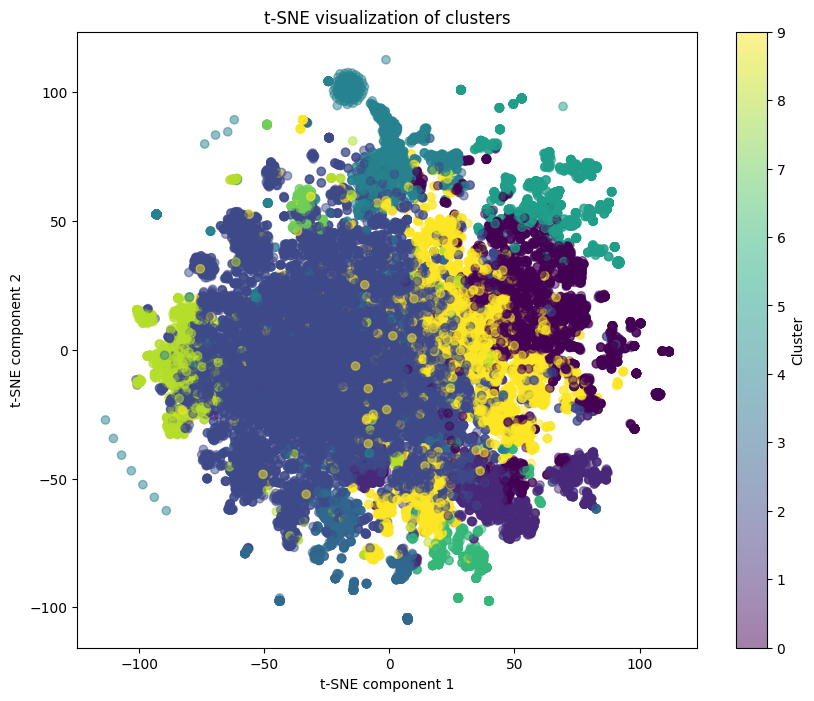

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
comment_vectors_tsne = tsne.fit_transform(comment_vectors_scaled)

df_sampled['tsne-1'] = comment_vectors_tsne[:, 0]
df_sampled['tsne-2'] = comment_vectors_tsne[:, 1]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_sampled['tsne-1'], df_sampled['tsne-2'], c=df_sampled['cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of clusters')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
stop_words = np.loadtxt('stopwords-ru.txt', dtype=str,usecols=0)

In [ ]:
len(stop_words)

559

In [ ]:
vectorizer = CountVectorizer(stop_words=list(stop_words))
X = vectorizer.fit_transform(df['textDisplay'].fillna(''))

word_counts = np.asarray(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'word': words, 'count': word_counts})

top_words = word_freq.sort_values(by='count', ascending=False).head(10)
print("Топ-10 популярных осмысленных слов среди всех комментариев:")
print(top_words)

Топ-10 популярных осмысленных слов среди всех комментариев:
            word  count
17582     выпуск  10373
97140         ян   8884
96671    юбилеем   8744
85457     топлес   8086
11107     борода   7249
177           10   6718
13787      видео   6659
35709    команда   4580
31909  интересно   2806
74011      ролик   2700


In [ ]:
least_words = word_freq.sort_values(by='count', ascending=True).head(10)
print("Топ-10 наименее популярных осмысленных слов среди всех комментариев:")
print(least_words)

Топ-10 наименее популярных осмысленных слов среди всех комментариев:
                                    word  count
97606  𝕏𝕒𝕒𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕩𝕒𝕩𝕩      1
40608                         майкрософт      1
40610                               майл      1
40611                             майлза      1
40612                               майн      1
40613                              майна      1
40614                            майнеры      1
40615                            майнили      1
74651                             рэпера      1
40618                        майнинговые      1
